MNIST DATASET

In [1]:
# IMPORT LIBRAY
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
display(X_train_full.shape)
display(y_train_full.shape)
display(X_test.shape)
display(y_test.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [4]:
y_train_full[0]

5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

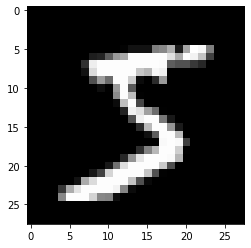

In [5]:
img = X_train_full[0]
display(img)
plt.imshow(img, cmap="gray")

In [6]:
label = y_train_full[0]
label

5

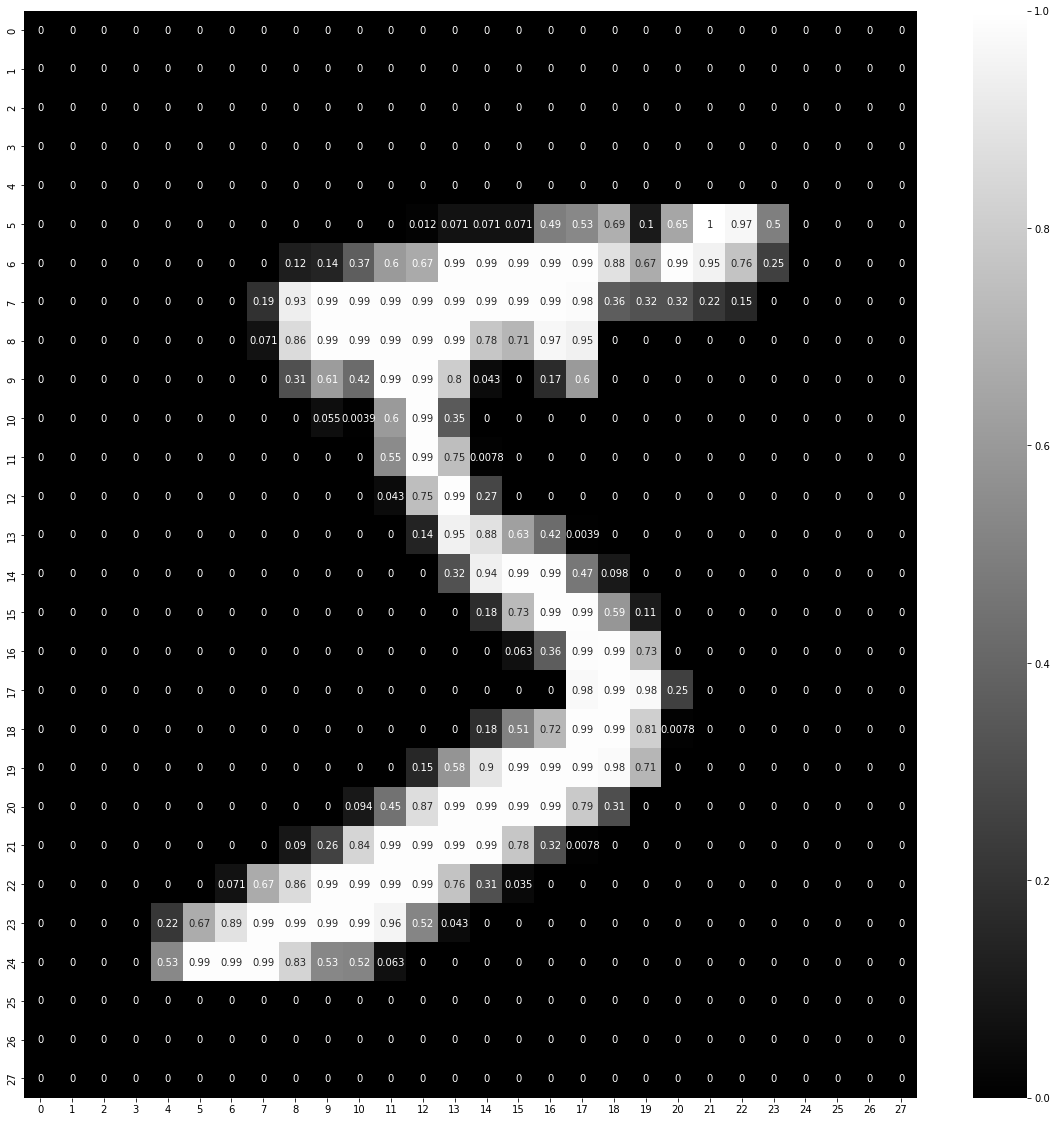

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [8]:
X_valid, X_train= X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [11]:
img.shape

(28, 28)

In [12]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer")
]

In [13]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
784*300+300 + 300*100+100 + 100*10+10

266610

In [15]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION, optimizer= OPTIMIZERS, metrics = METRICS)

In [16]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5906 - accuracy: 0.8475 - val_loss: 0.2977 - val_accuracy: 0.9192
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2835 - accuracy: 0.9202 - val_loss: 0.2346 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2327 - accuracy: 0.9340 - val_loss: 0.2057 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1999 - accuracy: 0.9432 - val_loss: 0.1763 - val_accuracy: 0.9522
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1759 - accuracy: 0.9497 - val_loss: 0.1659 - val_accuracy: 0.9558
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1567 - accuracy: 0.9544 - val_loss: 0.1509 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1407 - accuracy: 0.9595 - val_loss: 0.1335 - val_accurac

In [17]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.590637,0.847455,0.297654,0.9192
1,0.283518,0.920164,0.234609,0.9348
2,0.232702,0.933982,0.205712,0.9446
3,0.199882,0.943182,0.176287,0.9522
4,0.175923,0.949655,0.165912,0.9558
5,0.156731,0.954382,0.150870,0.9604
6,0.140694,0.959455,0.133517,0.9646
7,0.127601,0.963673,0.124799,0.9680
8,0.116604,0.966818,0.121873,0.9670
9,0.106740,0.969709,0.110436,0.9702


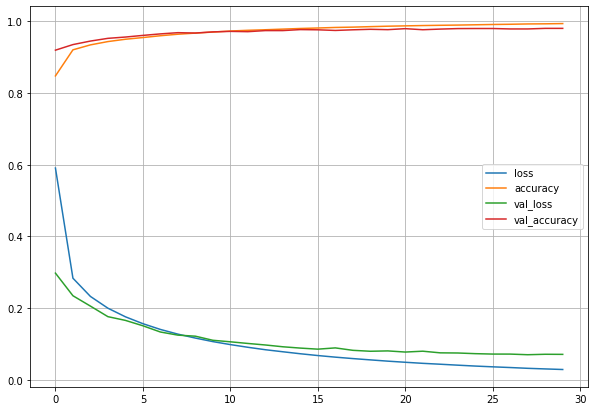

In [18]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [19]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9784


[0.07235509902238846, 0.9783999919891357]

In [20]:
model_clf.save("mnist_model_full.h5")

In [21]:
X_new = X_test[:3]
y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [22]:
X_new.shape

(3, 28, 28)

In [23]:
y_prob.shape

(3, 10)

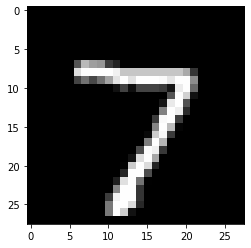

In [24]:
plt.imshow(X_new[0], cmap="gray")

In [25]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

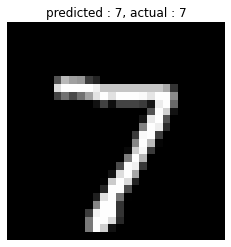

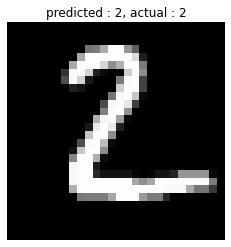

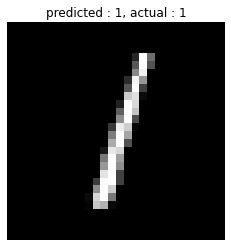

In [28]:
for img_array, pred, actual in zip(X_new, y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted : {pred}, actual : {actual}")
    plt.axis("off")
    plt.show()

**TRANSFER LEARNING**

  classifiy handwritten digits into odd or even

In [29]:
predicted_model = tf.keras.models.load_model("mnist_model_full.h5")
predicted_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
for layer in predicted_model.layers:
    print(f"{layer.name} :: {layer.trainable}")

inputLayer :: True
hiddenLayer01 :: True
hiddenLayer02 :: True
outputLayer :: True


In [32]:
for layer in predicted_model.layers[:-1]:
    layer.trainable = False

In [33]:
for layer in predicted_model.layers:
    print(f"{layer.name} :: {layer.trainable}")

inputLayer :: False
hiddenLayer01 :: False
hiddenLayer02 :: False
outputLayer :: True


In [34]:
lower_pretrained_model = predicted_model.layers[:-1]

In [35]:
new_model = tf.keras.models.Sequential(
    lower_pretrained_model
)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [36]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label % 2 == 0, 1, 0)
    return labels

In [37]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [38]:
np.unique(y_train_bin)

array([0, 1])

In [39]:
new_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"]
)

In [40]:
history = new_model.fit(
    X_train, 
    y_train_bin, 
    epochs=10, 
    validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1750 - accuracy: 0.9352 - val_loss: 0.1276 - val_accuracy: 0.9570
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1177 - accuracy: 0.9589 - val_loss: 0.1127 - val_accuracy: 0.9614
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1064 - accuracy: 0.9628 - val_loss: 0.1065 - val_accuracy: 0.9636
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9650 - val_loss: 0.1052 - val_accuracy: 0.9654
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9664 - val_loss: 0.1041 - val_accuracy: 0.9640
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0947 - accuracy: 0.9677 - val_loss: 0.0999 - val_accuracy: 0.9668
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0928 - accuracy: 0.9679 - val_loss: 0.0987 - val_accuracy:

In [41]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9642


[0.10149065405130386, 0.9642000198364258]

In [43]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.999, 0.001],
       [0.006, 0.994],
       [0.991, 0.009]], dtype=float32)

In [44]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [45]:
y_test_bin[:3]

array([0, 1, 0])

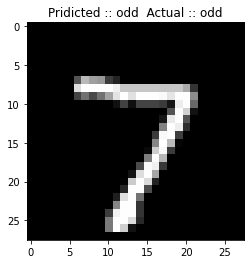

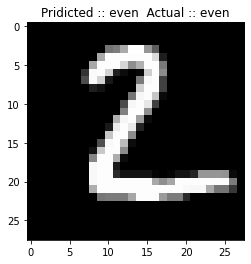

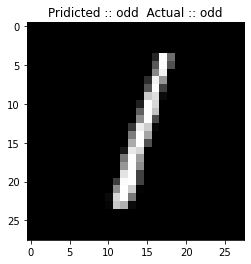

In [47]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    plt.imshow(img_array, cmap="gray")
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"
    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.title(f"Pridicted :: {pred}  Actual :: {actual}")
    plt.show()

**TRAIN A CNN MODEL ON MNIST DATA**

In [48]:
X_train[0].shape

(28, 28)

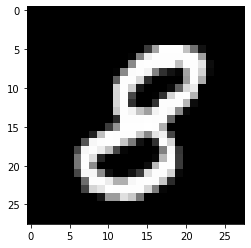

In [50]:
img = X_train[5]
plt.imshow(img, cmap="gray")
plt.show()

In [53]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)
X_train_CNN.shape

(55000, 28, 28, 1)

In [54]:
display(X_train[0].shape)
display(X_train_CNN[0].shape)


(28, 28)

(28, 28, 1)

In [55]:
input_shape = (28,28,1)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax"),
]

In [56]:
CNN_model = tf.keras.Sequential(LAYERS)
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [57]:
CNN_model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy']
)

In [58]:
history = CNN_model.fit(
    X_train_CNN, 
    y_train, 
    epochs=35, 
    validation_data=(X_valid_CNN, y_valid)
    )


Epoch 1/35
1719/1719 [==============================] - 50s 29ms/step - loss: 0.5599 - accuracy: 0.8393 - val_loss: 0.2520 - val_accuracy: 0.9216
Epoch 2/35
1719/1719 [==============================] - 49s 29ms/step - loss: 0.1737 - accuracy: 0.9493 - val_loss: 0.1309 - val_accuracy: 0.9634
Epoch 3/35
1719/1719 [==============================] - 50s 29ms/step - loss: 0.1189 - accuracy: 0.9649 - val_loss: 0.0995 - val_accuracy: 0.9714
Epoch 4/35
1719/1719 [==============================] - 49s 28ms/step - loss: 0.0967 - accuracy: 0.9705 - val_loss: 0.0826 - val_accuracy: 0.9770
Epoch 5/35
1719/1719 [==============================] - 49s 28ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.0762 - val_accuracy: 0.9778
Epoch 6/35
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 7/35
1719/1719 [==============================] - 49s 28ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0717 -

In [59]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0337 - accuracy: 0.9895


[0.03372814878821373, 0.9894999861717224]

In [61]:
CNN_model.save("CNN_Model-FUll.h5")